# **Explain the Problem**
For most undergraduate students newly enrolled at McGill University, selecting the optimal set of courses to complete the required 120 credits for their degree can be a challenging task. Freshmen must navigate prerequisites, elective requirements, and constraints related to major and minor requirements over their four-year academic journey. This project proposes to use linear optimization techniques to help a student, who has major in Math&CS and minor in management, streamline his course selection process, balancing academic requirements, interests, and time constraints.

**Key Features and Considerations**:
1. Credit Requirements: Ensure that students complete exactly 120 credits, aligning with McGill’s undergraduate graduation requirement.
2. Course Prerequisites and Sequencing: Account for courses with prerequisites, ensuring that students can take advanced courses when needed.
3. Major-Specific Requirements: Incorporate required core courses and electives based on the student’s chosen major(s) and/or minor(s).
4. Electives and Interests: Allow flexibility for students to select elective courses based on individual interests while meeting the credit allocation for electives.
5. Time and Workload Balance: Distribute course loads evenly across terms to avoid overloading or underloading any single semester.

# **Problem Formation**

### Decision Variables

- $\text{Take}_{i, j}$: Binary decision variable indicating whether course $i$ is taken in semester $j$.

**Definitions:**
- $i$: Index for course sections.
- $j$: Index for semesters ($j \in \{1, 2, \dots, 8\}$).
- $k$: Index for prerequisite courses for course $i$.
- $j'$: Index for semesters before $j$ (i.e., semesters in which prerequisites may be completed).
- $i_1, i_2$: Indices for course sections that overlap in time or have restrictions.

- $\text{Credits}_{i}$: Number of credits for course $i$.
- $\text{Prereq}(i)$: Set of prerequisite courses for course $i$.
- $\text{RestrictedPairs}$: Set of all course section pairs that cannot be taken in the same semester due to restrictions (e.g., overlapping content).
- $\text{OverlapPairs}$: Set of all course section pairs that overlap in schedule (e.g., same day and time).
- $\text{Sections}(c)$: Set of all sections for a given course $c$.
- $\text{RequiredCourses}$: Set of all required course sections that must be completed during the program.
- $\text{Quality}_{i}$: Quality score for course $i$.
- $\text{ProfessorRating}_{i}$: Professor rating for course $i$.
- $\text{Difficulty}_{i}$: Difficulty score for course $i$.

### Objective Function
Maximize the overall course quality, professor rating, and minimize difficulty based on the following weights:
- **Quality**: $\text{Weight}_{q}$
- **Professor Rating**: $\text{Weight}_{r}$
- **Difficulty**: $\text{Weight}_{d}$


$$
\text{Maximize: } \sum_{i, j} \text{Take}_{i, j} \cdot \left(
\text{Weight}_{q} \cdot \text{Quality}_{i} +
\text{Weight}_{r} \cdot \text{ProfessorRating}_{i} -
\text{Weight}_{d} \cdot \text{Difficulty}_{i}
\right)
$$




### Variables
$\text{Take}_{i, j}$: Binary decision variables indicating whether a course section is taken in a given semester.

### Constraints

#### 1. Course Load Per Semester
Each student must take exactly five courses each semester:


$$
\sum_{i} \text{Take}_{i, j} = 5, \quad \forall j \in \{1, 2, \dots, 8\}.
$$


#### 2. Credit Requirements
Total credits must be between 120 and 122 across all semesters:

$$
120 \leq \sum_{i} \sum_{j} \text{Take}_{i, j} \cdot \text{Credits}_{i} \leq 122.
$$

#### 3. Prerequisite Constraints
Ensure that prerequisites are met before taking a course:
If multiple prerequisites (OR conditions): At least one prerequisite must be completed before the course.
If single prerequisite (AND condition): The prerequisite must be completed before the course.


$$
\sum_{k \in \text{Prereq}(i)} \sum_{j' < j} \text{Take}_{k, j'} \geq \text{Take}_{i, j}.
$$

$$
\sum_{j' < j} \text{Take}_{k, j'} \geq \text{Take}_{i, j}.
$$

#### 4. Course Availability Per Term
Courses must be taken in their designated terms (Fall or Winter):

$$
\text{Take}_{i, j} = 0, \quad \text{if } i \text{ is not offered in the term of semester } j.
$$


#### 5. No Multiple Sections
Students can enroll in only one section of any given course:

$$
\sum_{i \in \text{Sections}(c)} \sum_{j} \text{Take}_{i, j} \leq 1, \quad \forall c \in \text{Courses}.
$$

#### 6. Course Restrictions
Some courses cannot be taken in the same semester due to restrictions (e.g., overlapping content):

$$
\text{Take}_{i_1, j} + \text{Take}_{i_2, j} \leq 1, \quad \forall (i_1, i_2) \in \text{RestrictedPairs}, \, \forall j \in \{1, 2, \dots, 8\}.
$$

#### 7. No Time Conflicts
Within same semester, courses scheduled at the same time on the same day must not be taken together:

$$
\text{Take}_{i_1, j} + \text{Take}_{i_2, j} \leq 1, \quad \forall (i_1, i_2) \in \text{OverlapPairs}, \, \forall j \in \{1, 2, \dots, 8\}.
$$



#### 8.Math Complementary Courses
Ensures that the total credits from selected math complementary courses across all semesters meet the minimum requirement of 12.

$$
\sum_{i \in \text{MathComplementary}} \sum_{j} \text{Take}_{i, j} \cdot \text{Credits}_{i} \geq 12.
$$


#### 9. Complementary Courses Constraint
Guarantees that at least 9 credits are taken from advanced computer science courses, aligning with the specialization objectives.
$$
\sum_{i \in \text{CompComplementary}} \sum_{j} \text{Take}_{i, j} \cdot \text{Credits}_{i} \geq 9.
$$

#### 10. Required Courses:
All mandatory courses for the student’s program must be taken at least once during the four years.
$$
\sum_{j} \text{Take}_{i, j} \geq 1, \quad \forall i \in \text{RequiredCourses}.
$$

### Optimization and Output
The model is optimized to find the best schedule that maximizes the objective function. The solution indicates which courses are selected in each semester:
Output: Courses selected for each Semester if the model finds an optimal solution.

## **Load Data and Set up enviroment**

In [ ]:
!pip install gurobipy

In [1]:
import numpy as np
from gurobipy import *
import gurobipy as gp

In [2]:
params = {
"WLSACCESSID": '3b19c1bf-0502-421e-8f6f-4fcf1eb4cdc6',
"WLSSECRET": '2870e957-0eb6-46ef-a4e3-c3111c7de5a1',
"LICENSEID": 2574457,
}
env = gp.Env(params=params)

Set parameter Username
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2574457
Academic license 2574457 - for non-commercial use only - registered to yi___@mail.mcgill.ca


In [ ]:
import pandas as pd

df = pd.read_excel('MGSC 662 Group Project Data-4.xlsx', sheet_name = 4)
df.shape[0]

126

# **Data Processing**

In [ ]:
df = df.dropna(subset=['Course Schedule'])

In [ ]:
df = df.dropna(subset=['Professor'])

In [ ]:
#Fill Null values with mean for difficulty varaible
mean_difficulty = df['Difficulty'].mean()

df['Difficulty'].fillna(mean_difficulty, inplace=True)


<ipython-input-156-5d20b037674a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Difficulty'].fillna(mean_difficulty, inplace=True)


In [ ]:
#Fill Null values with mean for Quality varaible
mean_difficulty = df['Quality'].mean()

df['Quality'].fillna(mean_difficulty, inplace=True)

<ipython-input-157-1c030e7140c1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quality'].fillna(mean_difficulty, inplace=True)


In [ ]:
#Fill Null values with mean for Professor Rating varaible
mean_difficulty = df['Professor Rating'].mean()

df['Professor Rating'].fillna(mean_difficulty, inplace=True)

<ipython-input-158-e716f532dc97>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Professor Rating'].fillna(mean_difficulty, inplace=True)


In [ ]:
# Obtain the unique list of courses
total_courses_list = df.iloc[:, 0].unique()
len(total_courses_list)

60

In [ ]:
# Assuming 'Course Number' and 'Section' are the column names
df['Course_Section'] = df['Course Number'].astype(str) + '-' + df['section'].astype(str)
total_courses_section_list = df['Course_Section'].unique()
len(total_courses_section_list)

119

In [ ]:
# Check for duplicates in the Course_Section column and show them
duplicates = df[df['Course_Section'].duplicated(keep=False)]
print(f'Number of duplicate Course Sections: {duplicates.shape[0]}')
print(duplicates)


Number of duplicate Course Sections: 0
Empty DataFrame
Columns: [Course Number, Subject, Course Name, Course Level, Credits, Prerequisite, Restrictions, Difficulty, Quality, Professor, Professor Rating, section, Term, Course Schedule, Prgram, Course_Section]
Index: []


In [ ]:
# Check for columns with null values
null_columns = df.columns[df.isnull().any()].tolist()

print("Columns with null values:", null_columns)

Columns with null values: ['Prerequisite', 'Restrictions']


In [ ]:
df['Restrictions'] = df['Restrictions'].astype(str).str.replace(',', '/')

In [ ]:
df.tail(40)

,Course Number,Subject,Course Name,Course Level,Credits,Prerequisite,Restrictions,Difficulty,Quality,Professor,Professor Rating,section,Term,Course Schedule,Prgram,Course_Section
86,COMP 540,COMP,Matrix Computations,500,4,COMP 350,nan,3.100000,5.000000,Xiao-Wen Chang,3.400000,1,Winter,MW 16:05:00-17:25:00,Major,COMP 540-1
87,COMP 547,COMP,Cryptography & Data Security,500,4,COMP 360/MATH 323,nan,4.300000,4.700000,Claude Crépeau,2.600000,1,Fall,TR 13:05:00-14:25:00,Major,COMP 547-1
88,COMP 551,COMP,Applied Machine Learning,500,4,MATH 323/COMP 202/MATH 133/MATH 222,nan,3.700000,3.200000,Reihaneh Rabbany,3.400000,1,Fall,MW 15:35:00-15:55:00,Major,COMP 551-1
89,COMP 551,COMP,Applied Machine Learning,500,4,MATH 323/COMP 202/MATH 133/MATH 222,nan,3.168218,3.918404,YueLi,3.845098,2,Winter,TR 10:05:00-11:25:00,Major,COMP 551-2
90,MGCR 211,MGCR,Intro to financial accounting,200,3,NaN,nan,3.200000,4.000000,Jingjing Zhang,4.000000,1,Fall,MW 08:35:00-09:55:00,Minor,MGCR 211-1
91,MGCR 211,MGCR,Intro to financial accounting,200,3,NaN,nan,3.100000,4.500000,Dongyoung Lee,4.300000,2,Fall,TR 10:05:00-11:25:00,Minor,MGCR 211-2
92,MGCR 211,MGCR,Intro to financial accounting,200,3,NaN,nan,3.100000,4.500000,Dongyoung Lee,4.300000,3,Fall,TR 11:35:00-12:55:00,Minor,MGCR 211-3
93,MGCR 211,MGCR,Intro to financial accounting,200,3,NaN,nan,3.200000,4.000000,Jingjing Zhang,4.000000,4,Fall,MW 14:35:00-15:55:00,Minor,MGCR 211-4
94,MGCR 211,MGCR,Intro to financial accounting,200,3,NaN,nan,3.100000,4.500000,Dongyoung Lee,4.000000,5,Fall,MW 11:35:00-12:55:00,Minor,MGCR 211-5
95,MGCR 211,MGCR,Intro to financial accounting,200,3,NaN,nan,3.200000,4.000000,Jingjing Zhang,4.000000,6,Fall,MW 10:05:00-11:25:00,Minor,MGCR 211-6


In [ ]:
data = df.copy()

In [ ]:
# Regex pattern to match
pattern = r"^[MTWRF]+ \d{2}:\d{2}:\d{2}-\d{2}:\d{2}:\d{2}$"

# Check and print entries not matching the format
incorrect_entries = data[~data['Course Schedule'].str.match(pattern)]
if not incorrect_entries.empty:
    print("Entries not formatted correctly:")
    print(incorrect_entries)
else:
    print("All entries are correctly formatted.")

All entries are correctly formatted.


# **Model implementation**

In [ ]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
from datetime import datetime

# Initialize the model
model = gp.Model(env=env)

# Initialize Time periods (semesters), where 2 semesters per year for total of 8 semesters. Courses are taken over these 8 semesters.
semesters = list(range(1, 9))

# Decision variables, among all the courses with sections, deciding which section to be selected.
take_course = model.addVars(
    data['Course_Section'], semesters, vtype=GRB.BINARY, name="Take"
)

#Constraint: Five courses per semester, course have either 3-4 credits, Student can take no more than 17 credits persemester without further approvement.
for semester in semesters:
    model.addConstr(
        gp.quicksum(take_course[c, semester] for c in data['Course_Section']) == 5,
        f"FiveCourses_Sem{semester}"
    )


#Constraint: Total credits must be between 120 and 122. Total number of credits taken ranges from 120-122 with accomendation for 3 credit or 4 credit courses.
credits = data.set_index('Course_Section')['Credits'].to_dict()

model.addConstr(
    gp.quicksum(take_course[c, s] * credits[c] for c in data['Course_Section'] for s in semesters) >= 120,
    "MinCredits"
)
model.addConstr(
    gp.quicksum(take_course[c, s] * credits[c] for c in data['Course_Section'] for s in semesters) <= 122,
    "MaxCredits"
)

#Constraint: Prerequisite constraint
def add_prereq_constraints(course_section, prereqs, sem):
    and_conditions = prereqs.split(',')  # Split prerequisites at commas for "AND" conditions
    for cond in and_conditions:
        # Split each condition at '/' for "OR" conditions, and strip whitespace
        or_courses = [course.strip() for course in cond.split('/')]
        or_course_sections = [
            # Collect all sections of each prerequisite course from the dataset
            sec for course in or_courses for sec in data['Course_Section'] if course in sec
        ]
        if len(or_course_sections) > 1:
            # OR condition: at least one of the prerequisite sections must be met
            model.addConstr(
                gp.quicksum(take_course[sec, s] for sec in or_course_sections for s in semesters if s < sem) >= take_course[course_section, sem],
                f"Prereq_OR_{course_section}_Sem{sem}"
            )
        elif len(or_course_sections) == 1:
            # AND condition: this single prerequisite section must be met
            model.addConstr(
                gp.quicksum(take_course[or_course_sections[0], s] for s in semesters if s < sem) >= take_course[course_section, sem],
                f"Prereq_AND_{course_section}_Sem{sem}"
            )

# Apply prerequisite constraints for each course in the DataFrame
for index, row in data.iterrows():
    if pd.notna(row['Prerequisite']):
        for semester in semesters:
            add_prereq_constraints(row['Course_Section'], row['Prerequisite'], semester)


#Constraint: account for term availability
for index, row in data.iterrows():
    course_section = row['Course_Section']
    available_terms = row['Term']
    for semester in semesters:
        if semester % 2 == 1:  # Odd semesters for Fall
            if 'Fall' not in available_terms and 'Both' not in available_terms:
                model.addConstr(take_course[course_section, semester] == 0, f"NotOffered_{course_section}_Fall_Sem{semester}")
        elif semester % 2 == 0:  # Even semesters for Winter
            if 'Winter' not in available_terms and 'Both' not in available_terms:
                model.addConstr(take_course[course_section, semester] == 0, f"NotOffered_{course_section}_Winter_Sem{semester}")


#Constraint: Only one section per base course
course_section_to_base_course = {
    row['Course_Section']: row['Course Number'] for _, row in df.iterrows()
}

for course in set(course_section_to_base_course.values()):
    sections_for_course = [
        section for section, base_course in course_section_to_base_course.items()
        if base_course == course
    ]
    if sections_for_course:  # Check if there are any sections for this course
        model.addConstr(
            gp.quicksum(take_course[section, s] for section in sections_for_course for s in semesters) <= 1,
            name=f"OnlyOneSection_{course}"
        )


#Constraint: Restriction Constraint
def add_restriction_constraints(course_section, restrictions):
    restricted_courses = [course.strip() for course in restrictions.split('/')]

    # Gather all sections of each restricted course from the dataset
    restricted_course_sections = [
        sec for course in restricted_courses for sec in data['Course_Section'] if course in sec
    ]

    for restricted_course_sec in restricted_course_sections:
        for sem in semesters:
            # Ensure mutual exclusivity for each semester
            model.addConstr(
                take_course[course_section, sem] + take_course[restricted_course_sec, sem] <= 1,
                f"Restrict_{course_section}_{restricted_course_sec}_Sem{sem}"
            )

# Apply restriction constraints for each course in the DataFrame
for index, row in data.iterrows():
    if pd.notna(row['Restrictions']):
        add_restriction_constraints(row['Course_Section'], row['Restrictions'])


# Time schedule confict
# Helper functions to parse days and times
def parse_days(schedule):
    days = schedule.split(' ')[0]
    return [days[i:i+1] for i in range(0, len(days), 1)]

def parse_time(t):
    return int(datetime.strptime(t, '%H:%M:%S').strftime('%H')) * 60 + int(datetime.strptime(t, '%H:%M:%S').strftime('%M'))

# Parsing course schedule to extract days and times
data['Days'] = data['Course Schedule'].apply(parse_days)
data['Start_Time'] = data['Course Schedule'].apply(lambda x: parse_time(x.split(' ')[1].split('-')[0]))
data['End_Time'] = data['Course Schedule'].apply(lambda x: parse_time(x.split(' ')[1].split('-')[1]))

# Constraint: No time conflicts within the same semester on overlapping days
for semester in semesters:
    for i in data.index:
        for j in data.index:
            if i != j:
                common_days = set(data.loc[i, 'Days']).intersection(data.loc[j, 'Days'])
                if common_days and not (data.loc[i, 'End_Time'] <= data.loc[j, 'Start_Time'] or data.loc[i, 'Start_Time'] >= data.loc[j, 'End_Time']):
                    model.addConstr(
                        take_course[data.loc[i, 'Course_Section'], semester] + take_course[data.loc[j, 'Course_Section'], semester] <= 1,
                        f"NoConflict_{data.loc[i, 'Course_Section']}_vs_{data.loc[j, 'Course_Section']}_Sem{semester}"
                    )



#Constraint: Requirement Constraint
# List of required courses from the uploaded image
required_courses = [
    'COMP 202', 'COMP 206', 'COMP 250', 'COMP 251', 'COMP 273', 'COMP 302',
    'COMP 330', 'COMP 360', 'MATH 222', 'MATH 223', 'MATH 235',
    'MATH 236', 'MATH 242', 'MATH 314', 'MATH 317', 'MATH 323', 'MATH 324', 'MATH 423']
# Constraint to ensure each required course is taken at least once
for course in required_courses:
    model.addConstr(
        gp.quicksum(take_course[c, s] for c in data['Course_Section'] if course in c for s in semesters) >= 1,
        f"Req_{course}"
    )

#Constraint: Compelementary Constraints
math_complementary_courses = ["MATH 204","MATH 208","MATH 308","MATH 327","MATH 340","MATH 350","MATH 352","MATH 410","MATH 427",
    "MATH 447","MATH 523","MATH 524","MATH 525","MATH 527D1","MATH 527D2","MATH 545","MATH 558","MATH 559","MATH 578","MATH 598"]
# Filter Course_Sections that belong to math_complementary_courses
math_complementary_sections = [
    c for c in data['Course_Section'] if any(course in c for course in math_complementary_courses)
]

# Ensure at least 12 credits are chosen from math_complementary_courses
model.addConstr(
    gp.quicksum(take_course[c, s] * credits[c] for c in math_complementary_sections for s in semesters) >= 12,
    "MinMathComplementaryCredits"
)

courses = ["COMP 424","COMP 462","COMP 540","COMP 547","COMP 551", "COMP 564","COMP 566","COMP 567"]

# Filter Course_Sections that belong to the specified courses list
comp_courses_sections = [
    c for c in data['Course_Section'] if any(course in c for course in courses)
]

# Ensure at least 9 credits are chosen from the specified courses
model.addConstr(
    gp.quicksum(take_course[c, s] * credits[c] for c in comp_courses_sections for s in semesters) >= 9,
    "MinCompCoursesCredits"
)

# Weights for each objective
weight_rating = 0.3333  # higher weight as maximizing professor rating is more important
weight_difficulty = 0.3333  # lower weight as minimizing difficulty
weight_quality = 0.3333 # medium weight as maximizing quality score

# Objective function
# Course quality:
course_quality = quicksum(take_course[row['Course_Section'], s] * row['Quality'] for _, row in data.iterrows() for s in semesters)
model.setObjectiveN(course_quality, weight=weight_quality, index=0)


# Professor Rating:
professor_rating = quicksum(take_course[row['Course_Section'], s] * row['Professor Rating'] for _, row in data.iterrows() for s in semesters)
model.setObjectiveN(professor_rating, weight=weight_rating, index=1)

# Difficulty:
Difficulty = quicksum(-take_course[row['Course_Section'], s] * row['Difficulty'] for _, row in data.iterrows() for s in semesters)
model.setObjectiveN(Difficulty, weight=weight_difficulty, index=2)
model.ModelSense = GRB.MAXIMIZE

# Optimize
model.optimize()

if model.status == GRB.OPTIMAL:
    # Iterate through each semester
    for s in semesters:
        print(f"Semester {s}:")
        selected_courses = []
        # Iterate through each course section
        for c in data['Course_Section']:
            # Check if the course is selected in this semester
            if take_course[c, s].X > 0.5:  # assuming variable threshold for binary decision
                # Retrieve course details from the DataFrame
                course_info = data.loc[data['Course_Section'] == c, ['Course Number', 'Course Schedule', 'Professor']].iloc[0]
                course_details = f"{course_info['Course Number']} ({c}), Schedule: {course_info['Course Schedule']}, Professor: {course_info['Professor']}"
                selected_courses.append(course_details)
        # Print selected courses for this semester
        if selected_courses:
            print("Courses selected:")
            for course in selected_courses:
                print(course)
        else:
            print("No courses selected.")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2574457 - for non-commercial use only - registered to yi___@mail.mcgill.ca
Optimize a model with 12086 rows, 952 columns and 34528 nonzeros
Model fingerprint: 0xec3aae45
Variable types: 0 continuous, 952 integer (952 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined)...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 (weighted) ...
-----

# **Calendar**

In [ ]:
data_dict = {}
for s in semesters:
    selected_courses = []
    for c in data['Course_Section']:
        if take_course[c, s].X > 0.5:  # If the course is selected for this semester
            # Retrieve details from the DataFrame
            course_info = data.loc[data['Course_Section'] == c, ['Course Number', 'Course Schedule', 'Professor']].iloc[0]
            course_details = (f"{course_info['Course Number']} ({c})", course_info['Course Schedule'])
            selected_courses.append(course_details)
    if selected_courses:
        data_dict[f"Semester {s}"] = selected_courses

# Print the constructed dictionary to verify
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(data_dict)


{   'Semester 1': [   ('MATH 140 (MATH 140-2)', 'MWF 09:35:00-10:25:00'),
                      ('MGCR 211 (MGCR 211-2)', 'TR 10:05:00-11:25:00'),
                      ('MGCR 271 (MGCR 271-2)', 'MW 13:05:00-14:25:00'),
                      ('MGCR 331 (MGCR 331-1)', 'TR 13:05:00-14:25:00'),
                      ('MGCR 352 (MGCR 352-7)', 'TR 11:35:00-12:55:00')],
    'Semester 2': [   ('BIOL 112 (BIOL 112-1)', 'MW 09:35:00-10:25:00'),
                      ('COMP 202 (COMP 202-4)', 'TR 13:05:00-14:25:00'),
                      ('ESYS 104 (ESYS 104-1)', 'TR 16:05:00-17:25:00'),
                      ('MATH 133 (MATH 133-5)', 'TR 08:35:00-09:55:00'),
                      ('MATH 141 (MATH 141-4)', 'MWF 10:35:00-11:25:00')],
    'Semester 3': [   ('BIOL 111 (BIOL 111-1)', 'MW 13:35:00-14:25:00'),
                      ('MATH 223 (MATH 223-2)', 'TR 11:35:00-12:55:00'),
                      ('MATH 235 (MATH 235-1)', 'MWF 10:35:00-11:25:00'),
                      ('MATH 323 (MATH 323-2)'

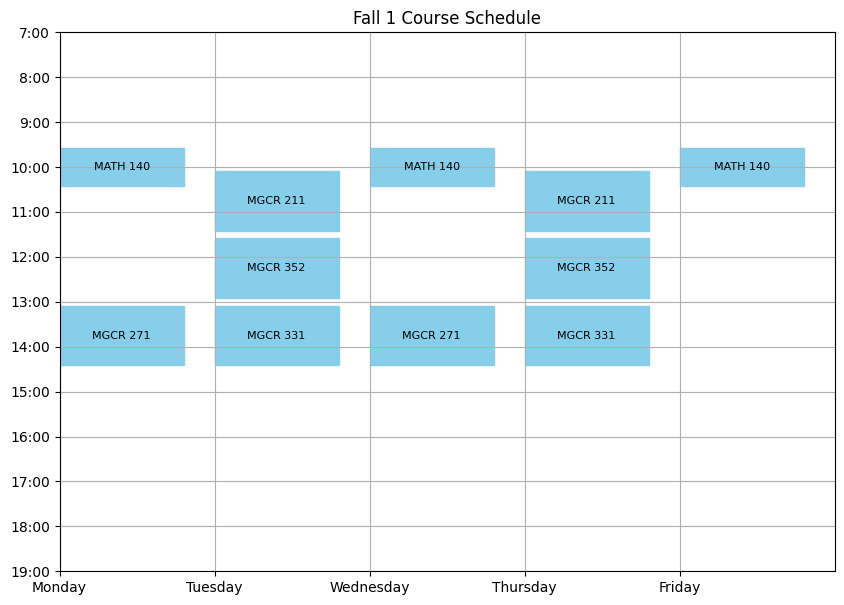

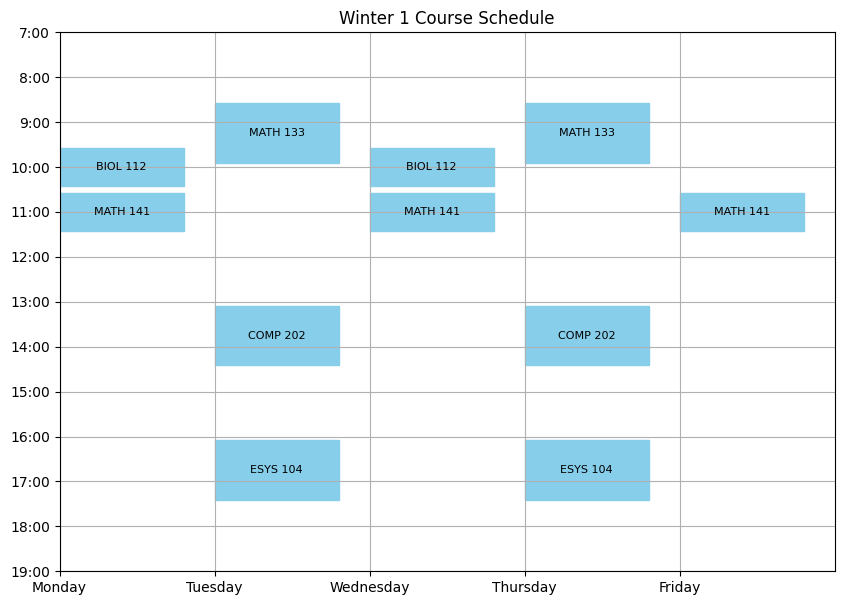

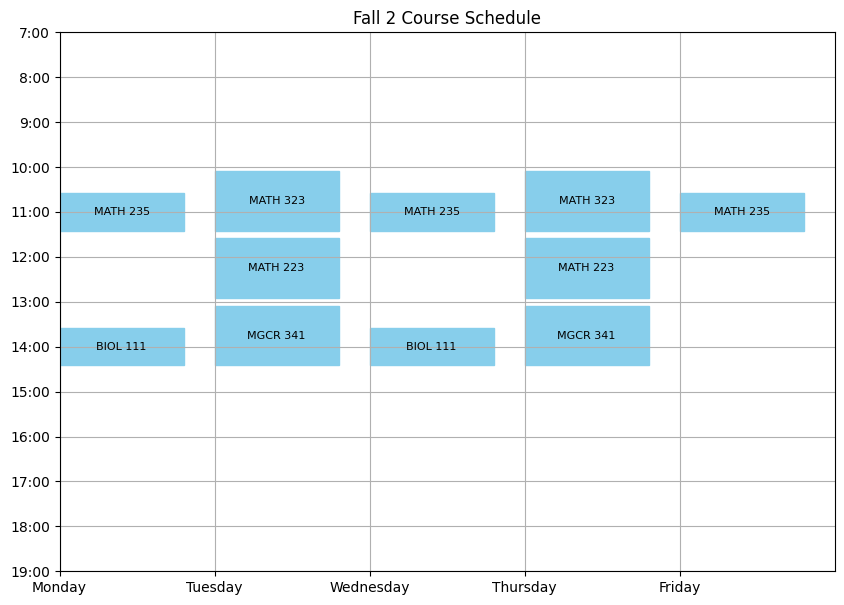

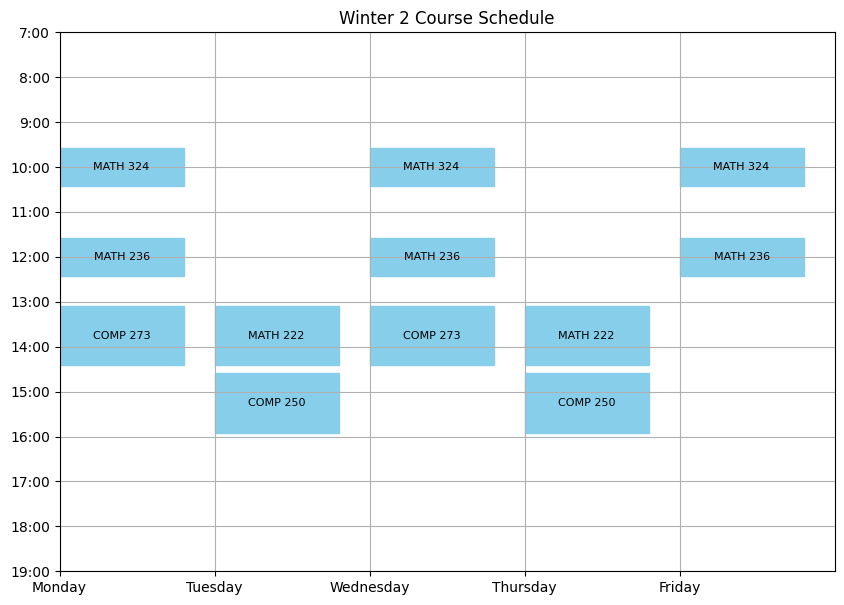

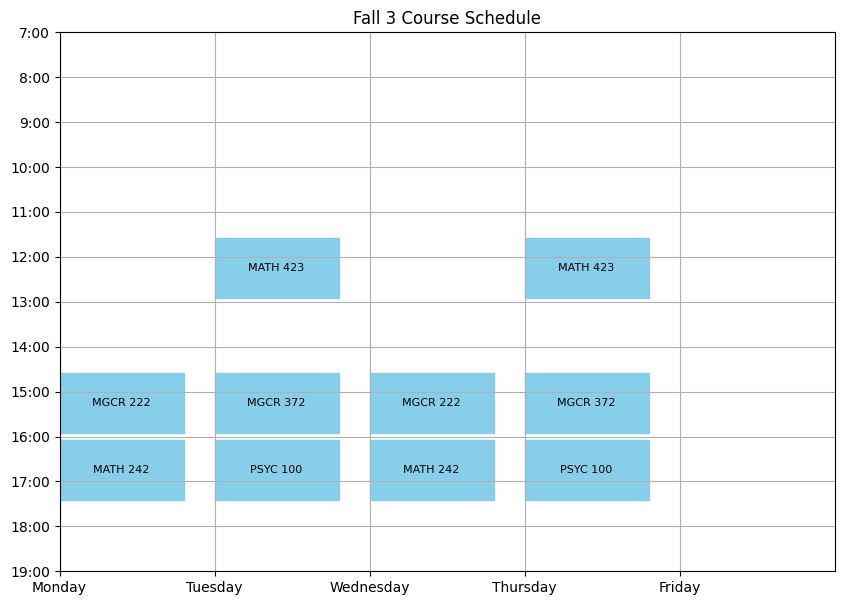

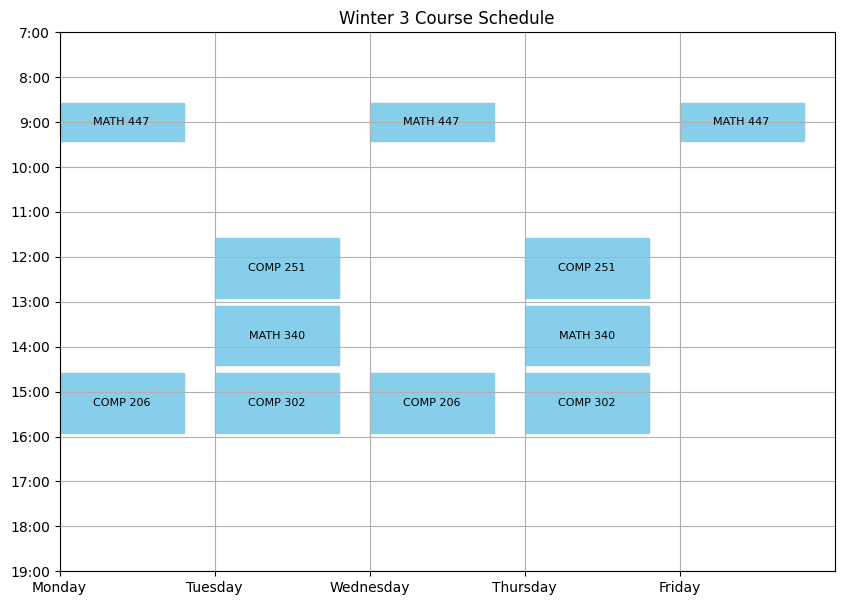

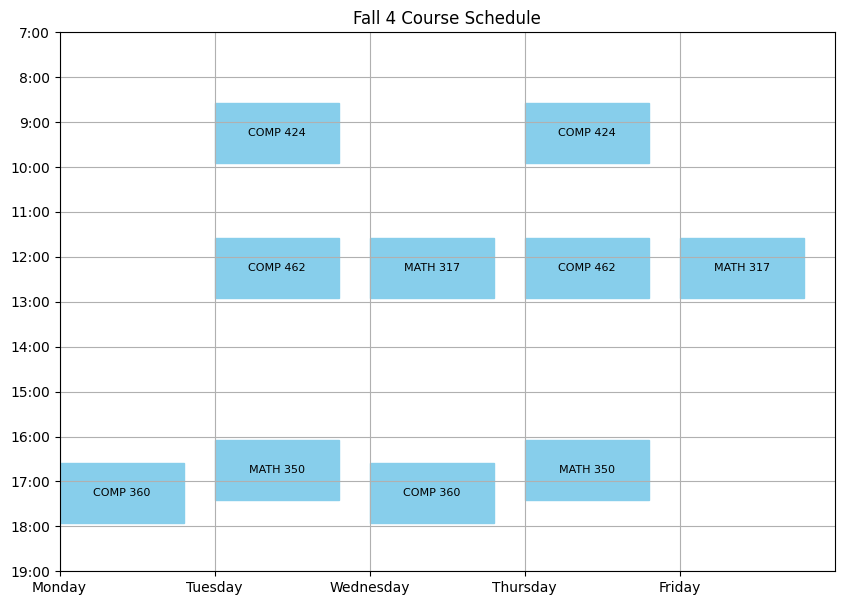

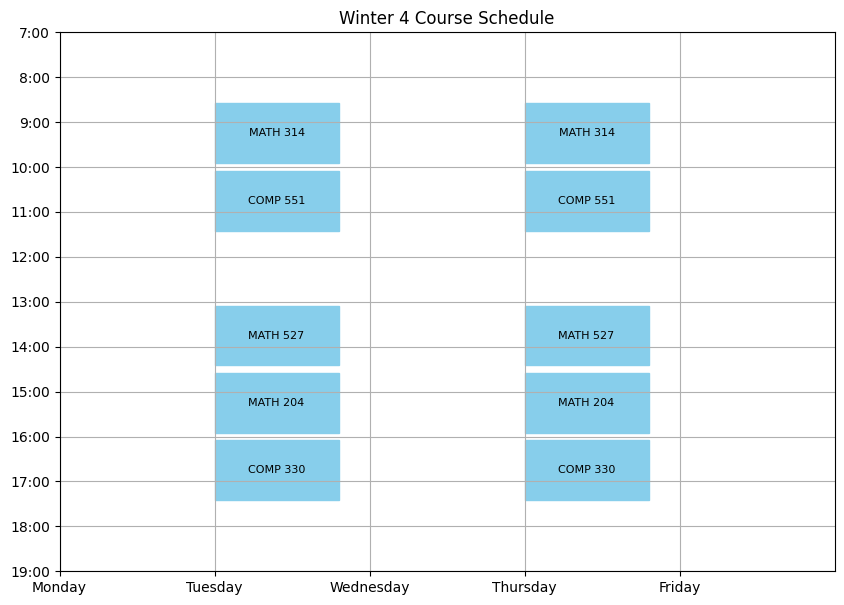

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

def parse_schedule(schedule):
    days, times = schedule.split(' ', 1)
    start_time, end_time = times.split('-')
    start_time = datetime.strptime(start_time.strip(), '%H:%M:%S').time()
    end_time = datetime.strptime(end_time.strip(), '%H:%M:%S').time()
    return days, start_time, end_time

day_to_index = {'M': 0, 'T': 1, 'W': 2, 'R': 3, 'F': 4}

def plot_semester_courses(semester_data, sem_num, start_year, start_month):
    fig, ax = plt.subplots(figsize=(10, 7))
    season = "Fall" if sem_num % 2 != 0 else "Winter"
    year_part = (sem_num + 1) // 2
    ax.set_title(f'{season} {year_part} Course Schedule')

    for course, schedule in semester_data:
        days, start_time, end_time = parse_schedule(schedule)
        start_hour = start_time.hour + start_time.minute / 60
        end_hour = end_time.hour + end_time.minute / 60

        for day in days:
            if day in day_to_index:
                day_index = day_to_index[day]
                ax.add_patch(plt.Rectangle((day_index, start_hour), 0.8, end_hour - start_hour, color='skyblue'))
                ax.text(day_index + 0.4, (start_hour + end_hour) / 2, course.split(' (')[0], ha='center', va='center', color='black', fontsize=8)

    ax.set_xlim(0, 5)
    ax.set_ylim(19, 7)  # Ensure this is from 7 to 22 for ascending order
    ax.set_xticks(range(5))
    ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    ax.set_yticks(range(7, 20))
    ax.set_yticklabels([f'{hour}:00' for hour in range(7, 20)])
    ax.grid(True)
    plt.show()

# Assuming data_dict is defined and populated with your course data
start_year = 2024
start_month = 9  # September
for sem_num, semester in enumerate(data_dict.keys(), start=1):
    plot_semester_courses(data_dict[semester], sem_num, start_year, start_month)
    start_month += 4  # Increment start month for next semester


# **Conclusion/Sensitivity Report**

### Sensitivity Analysis - We try to analyze the importance of choosing the same section but different sections.

In [ ]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
from datetime import datetime

# Initialize the model
model = gp.Model(env=env)

# Initialize Time periods (semesters), where 2 semesters per year for total of 8 semesters. Courses are taken over these 8 semesters.
semesters = list(range(1, 9))

# Decision variables, among all the courses with sections, deciding which section to be selected.
take_course = model.addVars(
    data['Course_Section'], semesters, vtype=GRB.BINARY, name="Take"
)

# Constraint 1: Five courses per semester, course have either 3-4 credits, Student can take no more than 17 credits persemester without further approvement.
for semester in semesters:
    model.addConstr(
        gp.quicksum(take_course[c, semester] for c in data['Course_Section']) == 5,
        f"FiveCourses_Sem{semester}"
    )


# Constraint 2: Total credits must be between 120 and 122. Total number of credits taken ranges from 120-122 with accomendation for 3 credit or 4 credit courses.
credits = data.set_index('Course_Section')['Credits'].to_dict()

model.addConstr(
    gp.quicksum(take_course[c, s] * credits[c] for c in data['Course_Section'] for s in semesters) >= 120,
    "MinCredits"
)
model.addConstr(
    gp.quicksum(take_course[c, s] * credits[c] for c in data['Course_Section'] for s in semesters) <= 122,
    "MaxCredits"
)

### Constraint 3: Prerequisite constraint
def add_prereq_constraints(course_section, prereqs, sem):
    and_conditions = prereqs.split(',')  # Split prerequisites at commas for "AND" conditions
    for cond in and_conditions:
        # Split each condition at '/' for "OR" conditions, and strip whitespace
        or_courses = [course.strip() for course in cond.split('/')]
        or_course_sections = [
            # Collect all sections of each prerequisite course from the dataset
            sec for course in or_courses for sec in data['Course_Section'] if course in sec
        ]
        if len(or_course_sections) > 1:
            # OR condition: at least one of the prerequisite sections must be met
            model.addConstr(
                gp.quicksum(take_course[sec, s] for sec in or_course_sections for s in semesters if s < sem) >= take_course[course_section, sem],
                f"Prereq_OR_{course_section}_Sem{sem}"
            )
        elif len(or_course_sections) == 1:
            # AND condition: this single prerequisite section must be met
            model.addConstr(
                gp.quicksum(take_course[or_course_sections[0], s] for s in semesters if s < sem) >= take_course[course_section, sem],
                f"Prereq_AND_{course_section}_Sem{sem}"
            )

# Apply prerequisite constraints for each course in the DataFrame
for index, row in data.iterrows():
    if pd.notna(row['Prerequisite']):
        for semester in semesters:
            add_prereq_constraints(row['Course_Section'], row['Prerequisite'], semester)


#Constraint 4:
# Update the model constraints to account for term availability
for index, row in data.iterrows():
    course_section = row['Course_Section']
    available_terms = row['Term']
    for semester in semesters:
        if semester % 2 == 1:  # Odd semesters for Fall
            if 'Fall' not in available_terms and 'Both' not in available_terms:
                model.addConstr(take_course[course_section, semester] == 0, f"NotOffered_{course_section}_Fall_Sem{semester}")
        elif semester % 2 == 0:  # Even semesters for Winter
            if 'Winter' not in available_terms and 'Both' not in available_terms:
                model.addConstr(take_course[course_section, semester] == 0, f"NotOffered_{course_section}_Winter_Sem{semester}")


# Constraint 5: Only one section per base course
# Assuming 'df' contains mapping between 'Course_Section' and 'Course Number'
course_section_to_base_course = {
    row['Course_Section']: row['Course Number'] for _, row in df.iterrows()
}

for course in set(course_section_to_base_course.values()):
    sections_for_course = [
        section for section, base_course in course_section_to_base_course.items()
        if base_course == course
    ]
    if sections_for_course:  # Check if there are any sections for this course
        model.addConstr(
            gp.quicksum(take_course[section, s] for section in sections_for_course for s in semesters) <= 1,
            name=f"OnlyOneSection_{course}"
        )


### Constraint 6: Restriction Constraint
def add_restriction_constraints(course_section, restrictions):
    restricted_courses = [course.strip() for course in restrictions.split('/')]

    # Gather all sections of each restricted course from the dataset
    restricted_course_sections = [
        sec for course in restricted_courses for sec in data['Course_Section'] if course in sec
    ]

    for restricted_course_sec in restricted_course_sections:
        for sem in semesters:
            # Ensure mutual exclusivity for each semester
            model.addConstr(
                take_course[course_section, sem] + take_course[restricted_course_sec, sem] <= 1,
                f"Restrict_{course_section}_{restricted_course_sec}_Sem{sem}"
            )

# Apply restriction constraints for each course in the DataFrame
for index, row in data.iterrows():
    if pd.notna(row['Restrictions']):
        add_restriction_constraints(row['Course_Section'], row['Restrictions'])



####Constraint 7: Time schedule confict
# Helper functions to parse days and times
def parse_days(schedule):
    days = schedule.split(' ')[0]
    return [days[i:i+1] for i in range(0, len(days), 1)]

def parse_time(t):
    return int(datetime.strptime(t, '%H:%M:%S').strftime('%H')) * 60 + int(datetime.strptime(t, '%H:%M:%S').strftime('%M'))

# Parsing course schedule to extract days and times
data['Days'] = data['Course Schedule'].apply(parse_days)
data['Start_Time'] = data['Course Schedule'].apply(lambda x: parse_time(x.split(' ')[1].split('-')[0]))
data['End_Time'] = data['Course Schedule'].apply(lambda x: parse_time(x.split(' ')[1].split('-')[1]))

# Constraint: No time conflicts within the same semester on overlapping days
for semester in semesters:
    for i in data.index:
        for j in data.index:
            if i != j:
                common_days = set(data.loc[i, 'Days']).intersection(data.loc[j, 'Days'])
                if common_days and not (data.loc[i, 'End_Time'] <= data.loc[j, 'Start_Time'] or data.loc[i, 'Start_Time'] >= data.loc[j, 'End_Time']):
                    model.addConstr(
                        take_course[data.loc[i, 'Course_Section'], semester] + take_course[data.loc[j, 'Course_Section'], semester] <= 1,
                        f"NoConflict_{data.loc[i, 'Course_Section']}_vs_{data.loc[j, 'Course_Section']}_Sem{semester}"
                    )



#Constraint 8: Requirement Constraint
# List of required courses from the uploaded image
required_courses = [
    'COMP 202', 'COMP 206', 'COMP 250', 'COMP 251', 'COMP 273', 'COMP 302',
    'COMP 330', 'COMP 360', 'MATH 222', 'MATH 223', 'MATH 235',
    'MATH 236', 'MATH 242', 'MATH 314', 'MATH 317', 'MATH 323', 'MATH 324', 'MATH 423']
# Constraint to ensure each required course is taken at least once
for course in required_courses:
    model.addConstr(
        gp.quicksum(take_course[c, s] for c in data['Course_Section'] if course in c for s in semesters) >= 1,
        f"Req_{course}"
    )

#Constraint 9: Compelementary Constraints
math_complementary_courses = ["MATH 204","MATH 208","MATH 308","MATH 327","MATH 340","MATH 350","MATH 352","MATH 410","MATH 427",
    "MATH 447","MATH 523","MATH 524","MATH 525","MATH 527D1","MATH 527D2","MATH 545","MATH 558","MATH 559","MATH 578","MATH 598"]
# Filter Course_Sections that belong to math_complementary_courses
math_complementary_sections = [
    c for c in data['Course_Section'] if any(course in c for course in math_complementary_courses)
]

# Ensure at least 12 credits are chosen from math_complementary_courses
model.addConstr(
    gp.quicksum(take_course[c, s] * credits[c] for c in math_complementary_sections for s in semesters) >= 12,
    "MinMathComplementaryCredits"
)

courses = ["COMP 424","COMP 462","COMP 540","COMP 547","COMP 551", "COMP 564","COMP 566","COMP 567"]

# Filter Course_Sections that belong to the specified courses list
comp_courses_sections = [
    c for c in data['Course_Section'] if any(course in c for course in courses)
]

# Ensure at least 9 credits are chosen from the specified courses
model.addConstr(
    gp.quicksum(take_course[c, s] * credits[c] for c in comp_courses_sections for s in semesters) >= 9,
    "MinCompCoursesCredits"
)

# Weights for each objective
weight_rating = 0.3333  # higher weight as maximizing professor rating is more important
weight_difficulty = 0.3333  # lower weight as minimizing difficulty
weight_quality = 0.3333 # medium weight as maximizing quality score

# Objective function
# Course quality:
course_quality = quicksum(take_course[row['Course_Section'], s] * row['Quality'] for _, row in data.iterrows() for s in semesters)
model.setObjectiveN(course_quality, weight=weight_quality, index=0)


# Professor Rating:
professor_rating = quicksum(take_course[row['Course_Section'], s] * row['Professor Rating'] for _, row in data.iterrows() for s in semesters)
model.setObjectiveN(professor_rating, weight=weight_rating, index=1)

# Difficulty:
Difficulty = quicksum(-take_course[row['Course_Section'], s] * row['Difficulty'] for _, row in data.iterrows() for s in semesters)
model.setObjectiveN(Difficulty, weight=weight_difficulty, index=2)
model.ModelSense = GRB.MAXIMIZE

# Optimize
model.optimize()

if model.status == GRB.OPTIMAL:
    # Iterate through each semester
    for s in semesters:
        print(f"Semester {s}:")
        selected_courses = []
        # Iterate through each course section
        for c in data['Course_Section']:
            # Check if the course is selected in this semester
            if take_course[c, s].X > 0.5:  # assuming variable threshold for binary decision
                # Retrieve course details from the DataFrame
                course_info = data.loc[data['Course_Section'] == c, ['Course Number', 'Course Schedule', 'Professor']].iloc[0]
                course_details = f"{course_info['Course Number']} ({c}), Schedule: {course_info['Course Schedule']}, Professor: {course_info['Professor']}"
                selected_courses.append(course_details)
        # Print selected courses for this semester
        if selected_courses:
            print("Courses selected:")
            for course in selected_courses:
                print(course)
        else:
            print("No courses selected.")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2574457 - for non-commercial use only - registered to yi___@mail.mcgill.ca
Optimize a model with 12086 rows, 952 columns and 34528 nonzeros
Model fingerprint: 0xec3aae45
Variable types: 0 continuous, 952 integer (952 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined)...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 (weighted) ...
-----

In [ ]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
from datetime import datetime

# Initialize the model
model_worst = gp.Model(env=env)

# Initialize Time periods (semesters), where 2 semesters per year for total of 8 semesters. Courses are taken over these 8 semesters.
semesters = list(range(1, 9))

# Decision variables, among all the courses with sections, deciding which section to be selected.
take_course_worst = model_worst.addVars(
    data['Course_Section'], semesters, vtype=GRB.BINARY, name="Take"
)

# Constraint 1: Five courses per semester, course have either 3-4 credits, Student can take no more than 17 credits per semester without further approval.
for semester in semesters:
    model_worst.addConstr(
        gp.quicksum(take_course_worst[c, semester] for c in data['Course_Section']) == 5,
        f"FiveCourses_Sem{semester}"
    )

# Constraint 2: Total credits must be between 120 and 122. Total number of credits taken ranges from 120-122 with accommodation for 3-credit or 4-credit courses.
credits = data.set_index('Course_Section')['Credits'].to_dict()

model_worst.addConstr(
    gp.quicksum(take_course_worst[c, s] * credits[c] for c in data['Course_Section'] for s in semesters) >= 120,
    "MinCredits"
)
model_worst.addConstr(
    gp.quicksum(take_course_worst[c, s] * credits[c] for c in data['Course_Section'] for s in semesters) <= 122,
    "MaxCredits"
)

### Constraint 3: Prerequisite constraint
def add_prereq_constraints(course_section, prereqs, sem):
    and_conditions = prereqs.split(',')  # Split prerequisites at commas for "AND" conditions
    for cond in and_conditions:
        # Split each condition at '/' for "OR" conditions, and strip whitespace
        or_courses = [course.strip() for course in cond.split('/')]
        or_course_sections = [
            # Collect all sections of each prerequisite course from the dataset
            sec for course in or_courses for sec in data['Course_Section'] if course in sec
        ]
        if len(or_course_sections) > 1:
            # OR condition: at least one of the prerequisite sections must be met
            model_worst.addConstr(
                gp.quicksum(take_course_worst[sec, s] for sec in or_course_sections for s in semesters if s < sem) >= take_course_worst[course_section, sem],
                f"Prereq_OR_{course_section}_Sem{sem}"
            )
        elif len(or_course_sections) == 1:
            # AND condition: this single prerequisite section must be met
            model_worst.addConstr(
                gp.quicksum(take_course_worst[or_course_sections[0], s] for s in semesters if s < sem) >= take_course_worst[course_section, sem],
                f"Prereq_AND_{course_section}_Sem{sem}"
            )

# Apply prerequisite constraints for each course in the DataFrame
for index, row in data.iterrows():
    if pd.notna(row['Prerequisite']):
        for semester in semesters:
            add_prereq_constraints(row['Course_Section'], row['Prerequisite'], semester)

# Constraint 4: Update the model constraints to account for term availability
for index, row in data.iterrows():
    course_section = row['Course_Section']
    available_terms = row['Term']
    for semester in semesters:
        if semester % 2 == 1:  # Odd semesters for Fall
            if 'Fall' not in available_terms and 'Both' not in available_terms:
                model_worst.addConstr(take_course_worst[course_section, semester] == 0, f"NotOffered_{course_section}_Fall_Sem{semester}")
        elif semester % 2 == 0:  # Even semesters for Winter
            if 'Winter' not in available_terms and 'Both' not in available_terms:
                model_worst.addConstr(take_course_worst[course_section, semester] == 0, f"NotOffered_{course_section}_Winter_Sem{semester}")

# Constraint 5: Only one section per base course
course_section_to_base_course = {
    row['Course_Section']: row['Course Number'] for _, row in df.iterrows()
}

for course in set(course_section_to_base_course.values()):
    sections_for_course = [
        section for section, base_course in course_section_to_base_course.items()
        if base_course == course
    ]
    if sections_for_course:  # Check if there are any sections for this course
        model_worst.addConstr(
            gp.quicksum(take_course_worst[section, s] for section in sections_for_course for s in semesters) <= 1,
            name=f"OnlyOneSection_{course}"
        )

### Constraint 6: Restriction Constraint
def add_restriction_constraints(course_section, restrictions):
    restricted_courses = [course.strip() for course in restrictions.split('/')]

    # Gather all sections of each restricted course from the dataset
    restricted_course_sections = [
        sec for course in restricted_courses for sec in data['Course_Section'] if course in sec
    ]

    for restricted_course_sec in restricted_course_sections:
        for sem in semesters:
            # Ensure mutual exclusivity for each semester
            model_worst.addConstr(
                take_course_worst[course_section, sem] + take_course_worst[restricted_course_sec, sem] <= 1,
                f"Restrict_{course_section}_{restricted_course_sec}_Sem{sem}"
            )

# Apply restriction constraints for each course in the DataFrame
for index, row in data.iterrows():
    if pd.notna(row['Restrictions']):
        add_restriction_constraints(row['Course_Section'], row['Restrictions'])

#### Constraint 7: Time schedule conflict
def parse_days(schedule):
    days = schedule.split(' ')[0]
    return [days[i:i+1] for i in range(0, len(days), 1)]

def parse_time(t):
    return int(datetime.strptime(t, '%H:%M:%S').strftime('%H')) * 60 + int(datetime.strptime(t, '%H:%M:%S').strftime('%M'))

data['Days'] = data['Course Schedule'].apply(parse_days)
data['Start_Time'] = data['Course Schedule'].apply(lambda x: parse_time(x.split(' ')[1].split('-')[0]))
data['End_Time'] = data['Course Schedule'].apply(lambda x: parse_time(x.split(' ')[1].split('-')[1]))

for semester in semesters:
    for i in data.index:
        for j in data.index:
            if i != j:
                common_days = set(data.loc[i, 'Days']).intersection(data.loc[j, 'Days'])
                if common_days and not (data.loc[i, 'End_Time'] <= data.loc[j, 'Start_Time'] or data.loc[i, 'Start_Time'] >= data.loc[j, 'End_Time']):
                    model_worst.addConstr(
                        take_course_worst[data.loc[i, 'Course_Section'], semester] + take_course_worst[data.loc[j, 'Course_Section'], semester] <= 1,
                        f"NoConflict_{data.loc[i, 'Course_Section']}_vs_{data.loc[j, 'Course_Section']}_Sem{semester}"
                    )

# Constraint 8: Requirement Constraint
required_courses = [
    'COMP 202', 'COMP 206', 'COMP 250', 'COMP 251', 'COMP 273', 'COMP 302',
    'COMP 330', 'COMP 360', 'MATH 222', 'MATH 223', 'MATH 235',
    'MATH 236', 'MATH 242', 'MATH 314', 'MATH 317', 'MATH 323', 'MATH 324', 'MATH 423']
for course in required_courses:
    model_worst.addConstr(
        gp.quicksum(take_course_worst[c, s] for c in data['Course_Section'] if course in c for s in semesters) >= 1,
        f"Req_{course}"
    )

# Constraint 9: Complementary Constraints
math_complementary_courses = ["MATH 204","MATH 208","MATH 308","MATH 327","MATH 340","MATH 350","MATH 352","MATH 410","MATH 427",
    "MATH 447","MATH 523","MATH 524","MATH 525","MATH 527D1","MATH 527D2","MATH 545","MATH 558","MATH 559","MATH 578","MATH 598"]
math_complementary_sections = [
    c for c in data['Course_Section'] if any(course in c for course in math_complementary_courses)
]

model_worst.addConstr(
    gp.quicksum(take_course_worst[c, s] * credits[c] for c in math_complementary_sections for s in semesters) >= 12,
    "MinMathComplementaryCredits"
)

courses = ["COMP 424","COMP 462","COMP 540","COMP 547","COMP 551", "COMP 564","COMP 566","COMP 567"]
comp_courses_sections = [
    c for c in data['Course_Section'] if any(course in c for course in courses)
]

model_worst.addConstr(
    gp.quicksum(take_course_worst[c, s] * credits[c] for c in comp_courses_sections for s in semesters) >= 9,
    "MinCompCoursesCredits"
)

# Weights for each objective
weight_rating = 0.3333
weight_difficulty = 0.3333
weight_quality = 0.3333

# Objective function
course_quality = gp.quicksum(take_course_worst[row['Course_Section'], s] * row['Quality'] for _, row in data.iterrows() for s in semesters)
model_worst.setObjectiveN(course_quality, weight=weight_quality, index=0)

professor_rating = gp.quicksum(take_course_worst[row['Course_Section'], s] * row['Professor Rating'] for _, row in data.iterrows() for s in semesters)
model_worst.setObjectiveN(professor_rating, weight=weight_rating, index=1)

difficulty = gp.quicksum(-take_course_worst[row['Course_Section'], s] * row['Difficulty'] for _, row in data.iterrows() for s in semesters)
model_worst.setObjectiveN(difficulty, weight=weight_difficulty, index=2)

model_worst.ModelSense = GRB.MINIMIZE

# Optimize
model_worst.optimize()

if model_worst.status == GRB.OPTIMAL:
    for s in semesters:
        print(f"Semester {s}:")
        worst_selected_courses = []
        for c in data['Course_Section']:
            if take_course_worst[c, s].X > 0.5:
                course_info = data.loc[data['Course_Section'] == c, ['Course Number', 'Course Schedule', 'Professor']].iloc[0]
                course_details = f"{course_info['Course Number']} ({c}), Schedule: {course_info['Course Schedule']}, Professor: {course_info['Professor']}"
                worst_selected_courses.append(course_details)
        if worst_selected_courses:
            print("Courses selected:")
            for course in worst_selected_courses:
                print(course)
        else:
            print("No courses selected.")



Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2574457 - for non-commercial use only - registered to yi___@mail.mcgill.ca
Optimize a model with 12086 rows, 952 columns and 34528 nonzeros
Model fingerprint: 0x1060489e
Variable types: 0 continuous, 952 integer (952 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined)...
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 (weighted) ...
-----

In [ ]:
# Store results for both models
selected_courses_model = {}
selected_courses_model_worst = {}

# Collect selected courses for `model`
for s in semesters:
    selected_courses_model[s] = {
        c for c in data['Course_Section'] if take_course[c, s].X > 0.5
    }

# Collect selected courses for `model_worst`
for s in semesters:
    selected_courses_model_worst[s] = {
        c for c in data['Course_Section'] if take_course_worst[c, s].X > 0.5
    }

# Find courses that are the same in both models
same_courses = []
for s in semesters:
    same_courses_in_semester = selected_courses_model[s] & selected_courses_model_worst[s]
    for course in same_courses_in_semester:
        same_courses.append({"Semester": s, "Course": course.split('_')[0], "Section": course})

# Output the list of same courses
print(same_courses)


[{'Semester': 2, 'Course': 'MATH 133-5', 'Section': 'MATH 133-5'}, {'Semester': 2, 'Course': 'COMP 202-4', 'Section': 'COMP 202-4'}, {'Semester': 3, 'Course': 'MATH 235-1', 'Section': 'MATH 235-1'}, {'Semester': 4, 'Course': 'MATH 222-3', 'Section': 'MATH 222-3'}, {'Semester': 4, 'Course': 'MATH 236-1', 'Section': 'MATH 236-1'}, {'Semester': 5, 'Course': 'MATH 242-1', 'Section': 'MATH 242-1'}, {'Semester': 6, 'Course': 'MATH 447-1', 'Section': 'MATH 447-1'}, {'Semester': 6, 'Course': 'MATH 340-1', 'Section': 'MATH 340-1'}, {'Semester': 7, 'Course': 'MATH 350-1', 'Section': 'MATH 350-1'}, {'Semester': 7, 'Course': 'COMP 424-1', 'Section': 'COMP 424-1'}, {'Semester': 8, 'Course': 'COMP 330-2', 'Section': 'COMP 330-2'}, {'Semester': 8, 'Course': 'MATH 314-2', 'Section': 'MATH 314-2'}, {'Semester': 8, 'Course': 'MATH 527-1', 'Section': 'MATH 527-1'}]


In [ ]:
all_courses_model = []
for semester, courses in selected_courses_model.items():
  for course in courses:
    all_courses_model.append(course)

all_courses_model_worst = []
for semester, courses in selected_courses_model_worst.items():
  for course in courses:
    all_courses_model_worst.append(course)

print("Courses in selected_courses_model:", all_courses_model)
print("Courses in selected_courses_model_worst:", all_courses_model_worst)

Courses in selected_courses_model: ['MGCR 331-1', 'MGCR 352-7', 'MGCR 211-2', 'MATH 140-2', 'MGCR 271-2', 'COMP 202-4', 'MATH 141-4', 'ESYS 104-1', 'BIOL 112-1', 'MATH 133-5', 'MATH 323-2', 'MATH 223-2', 'MGCR 341-1', 'BIOL 111-1', 'MATH 235-1', 'MATH 222-3', 'MATH 324-2', 'MATH 236-1', 'COMP 273-2', 'COMP 250-2', 'MATH 242-1', 'MATH 423-1', 'MGCR 222-4', 'MGCR 372-4', 'PSYC 100-1', 'COMP 251-2', 'COMP 206-2', 'MATH 447-1', 'MATH 340-1', 'COMP 302-2', 'COMP 462-1', 'MATH 317-1', 'COMP 360-1', 'MATH 350-1', 'COMP 424-1', 'COMP 330-2', 'MATH 527-1', 'MATH 204-1', 'MATH 314-2', 'COMP 551-2']
Courses in selected_courses_model_worst: ['MGCR 382-1', 'MATH 140-1', 'COMP 273-1', 'MGCR 331-2', 'MGCR 352-5', 'MATH 141-3', 'COMP 202-4', 'GEOG 205-1', 'MATH 133-5', 'MATH 204-1', 'MGCR 372-2', 'COMP 250-1', 'MATH 317-1', 'COMP 206-1', 'MATH 235-1', 'COMP 251-2', 'MATH 222-3', 'MATH 236-1', 'BIOL 112-1', 'MATH 323-3', 'MATH 242-1', 'COMP 462-1', 'MGCR 271-1', 'MGCR 211-8', 'MGCR 293-1', 'COMP 360-2'

In [ ]:
# Define the two lists
selected_courses_model = [
    'MGCR 331-1', 'MGCR 352-7', 'MGCR 211-2', 'MATH 140-2', 'MGCR 271-2', 'COMP 202-4', 'MATH 141-4',
    'ESYS 104-1', 'BIOL 112-1', 'MATH 133-5', 'MATH 323-2', 'MATH 223-2', 'MGCR 341-1', 'BIOL 111-1',
    'MATH 235-1', 'MATH 222-3', 'MATH 324-2', 'MATH 236-1', 'COMP 273-2', 'COMP 250-2', 'MATH 242-1',
    'MATH 423-1', 'MGCR 222-4', 'MGCR 372-4', 'PSYC 100-1', 'COMP 251-2', 'COMP 206-2', 'MATH 447-1',
    'MATH 340-1', 'COMP 302-2', 'COMP 462-1', 'MATH 317-1', 'COMP 360-1', 'MATH 350-1', 'COMP 424-1',
    'COMP 330-2', 'MATH 527-1', 'MATH 204-1', 'MATH 314-2', 'COMP 551-2'
]

selected_courses_model_worst = [
    'MGCR 382-1', 'MATH 140-1', 'COMP 273-1', 'MGCR 331-2', 'MGCR 352-5', 'MATH 141-3', 'COMP 202-4',
    'GEOG 205-1', 'MATH 133-5', 'MATH 204-1', 'MGCR 372-2', 'COMP 250-1', 'MATH 317-1', 'COMP 206-1',
    'MATH 235-1', 'COMP 251-2', 'MATH 222-3', 'MATH 236-1', 'BIOL 112-1', 'MATH 323-3', 'MATH 242-1',
    'COMP 462-1', 'MGCR 271-1', 'MGCR 211-8', 'MGCR 293-1', 'COMP 360-2', 'MATH 324-2', 'MATH 447-1',
    'MATH 340-1', 'COMP 551-2', 'MATH 423-1', 'COMP 302-1', 'MATH 350-1', 'COMP 424-1', 'MATH 208-1',
    'COMP 330-2', 'MATH 527-1', 'MATH 223-3', 'MATH 308-1', 'MATH 314-2'
]

# Find same courses with different sections
same_courses_different_sections = []

for course_model in selected_courses_model:
    base_course_model = course_model.split('-')[0]
    for course_model_worst in selected_courses_model_worst:
        base_course_model_worst = course_model_worst.split('-')[0]
        if base_course_model == base_course_model_worst and course_model != course_model_worst:
            same_courses_different_sections.append({
                "Course": base_course_model,
                "Original Section": course_model,
                "Worst Section": course_model_worst
            })

# Remove duplicates
unique_courses = {frozenset((item['Original Section'], item['Worst Section'])): item for item in same_courses_different_sections}
same_courses_different_sections = list(unique_courses.values())

# Output the result
for course in same_courses_different_sections:
    print(course)


{'Course': 'MGCR 331', 'Original Section': 'MGCR 331-1', 'Worst Section': 'MGCR 331-2'}
{'Course': 'MGCR 352', 'Original Section': 'MGCR 352-7', 'Worst Section': 'MGCR 352-5'}
{'Course': 'MGCR 211', 'Original Section': 'MGCR 211-2', 'Worst Section': 'MGCR 211-8'}
{'Course': 'MATH 140', 'Original Section': 'MATH 140-2', 'Worst Section': 'MATH 140-1'}
{'Course': 'MGCR 271', 'Original Section': 'MGCR 271-2', 'Worst Section': 'MGCR 271-1'}
{'Course': 'MATH 141', 'Original Section': 'MATH 141-4', 'Worst Section': 'MATH 141-3'}
{'Course': 'MATH 323', 'Original Section': 'MATH 323-2', 'Worst Section': 'MATH 323-3'}
{'Course': 'MATH 223', 'Original Section': 'MATH 223-2', 'Worst Section': 'MATH 223-3'}
{'Course': 'COMP 273', 'Original Section': 'COMP 273-2', 'Worst Section': 'COMP 273-1'}
{'Course': 'COMP 250', 'Original Section': 'COMP 250-2', 'Worst Section': 'COMP 250-1'}
{'Course': 'MGCR 372', 'Original Section': 'MGCR 372-4', 'Worst Section': 'MGCR 372-2'}
{'Course': 'COMP 206', 'Original

In [ ]:
# Lists to store courses with different sections
original_sections = []
worst_sections = []

# Find same courses with different sections
for course_model in selected_courses_model:
    base_course_model = course_model.split('-')[0]
    for course_model_worst in selected_courses_model_worst:
        base_course_model_worst = course_model_worst.split('-')[0]
        if base_course_model == base_course_model_worst and course_model != course_model_worst:
            original_sections.append(course_model)
            worst_sections.append(course_model_worst)

# Remove duplicates while maintaining order
original_sections = list(dict.fromkeys(original_sections))
worst_sections = list(dict.fromkeys(worst_sections))

# Output the lists
print("Original Sections:", original_sections)
print("Worst Sections:", worst_sections)


Original Sections: ['MGCR 331-1', 'MGCR 352-7', 'MGCR 211-2', 'MATH 140-2', 'MGCR 271-2', 'MATH 141-4', 'MATH 323-2', 'MATH 223-2', 'COMP 273-2', 'COMP 250-2', 'MGCR 372-4', 'COMP 206-2', 'COMP 302-2', 'COMP 360-1']
Worst Sections: ['MGCR 331-2', 'MGCR 352-5', 'MGCR 211-8', 'MATH 140-1', 'MGCR 271-1', 'MATH 141-3', 'MATH 323-3', 'MATH 223-3', 'COMP 273-1', 'COMP 250-1', 'MGCR 372-2', 'COMP 206-1', 'COMP 302-1', 'COMP 360-2']


In [ ]:
# prompt: give me the Difficulty Quality	Professor Professor Rating  in df for cours_sections in original_sections

# Assuming 'data' DataFrame is available and contains the necessary columns
# 'Difficulty', 'Quality', 'Professor Rating', and 'Course_Section'.
# Also assuming 'original_sections' list is available

import pandas as pd

# Create a DataFrame from the original sections
original_sections_df = pd.DataFrame({'Course_Section': original_sections})

# Merge the DataFrames
merged_df = pd.merge(original_sections_df, data, on='Course_Section', how='left')

# Select the relevant columns
result_df_best = merged_df[['Course_Section', 'Difficulty', 'Quality', 'Professor Rating']]

# Print or use the result
result_df_best

,Course_Section,Difficulty,Quality,Professor Rating
0,MGCR 331-1,3.168218,3.918404,3.845098
1,MGCR 352-7,3.200000,3.918404,4.900000
2,MGCR 211-2,3.100000,4.500000,4.300000
3,MATH 140-2,3.000000,5.000000,4.200000
4,MGCR 271-2,2.900000,5.000000,4.600000
5,MATH 141-4,3.200000,4.700000,4.200000
6,MATH 323-2,2.530000,4.160000,4.400000
7,MATH 223-2,3.168218,3.918404,3.845098
8,COMP 273-2,3.240000,4.030000,4.300000
9,COMP 250-2,3.580000,4.120000,4.200000


In [ ]:
# prompt: find the professor corresponding to these courses in result_df_best

# Assuming 'result_df_best' DataFrame is available and contains the 'Professor' column.
# Assuming 'selected_courses_model' and 'selected_courses_model_worst' are lists as provided before.

# Lists to store courses with different sections and their corresponding professors
original_sections = []
worst_sections = []
original_professors = []
worst_professors = []

# Find same courses with different sections and their professors
for course_model in selected_courses_model:
    base_course_model = course_model.split('-')[0]
    for course_model_worst in selected_courses_model_worst:
        base_course_model_worst = course_model_worst.split('-')[0]
        if base_course_model == base_course_model_worst and course_model != course_model_worst:
            # Find the professor for the original section
            original_professor = data.loc[data['Course_Section'] == course_model, 'Professor'].iloc[0]
            # Find the professor for the worst section
            worst_professor = data.loc[data['Course_Section'] == course_model_worst, 'Professor'].iloc[0]

            original_sections.append(course_model)
            worst_sections.append(course_model_worst)
            original_professors.append(original_professor)
            worst_professors.append(worst_professor)


# Create a DataFrame from the collected information
professor_comparison_df = pd.DataFrame({
    'Optimized model Section': original_sections,
    'Alternative Section': worst_sections,
    'Optimized model Professor': original_professors,
    'Alternative Professor': worst_professors
})

# Display the DataFrame
professor_comparison_df

,Optimized model Section,Alternative Section,Optimized model Professor,Alternative Professor
0,MGCR 331-1,MGCR 331-2,Matthew Goodman,Sol Tanguay
1,MGCR 352-7,MGCR 352-5,Simon Blanchette,Fabienne Cyrius
2,MGCR 211-2,MGCR 211-8,Dongyoung Lee,Yin Zhu
3,MATH 140-2,MATH 140-1,"Artem Kalmykov , Sidney Trudeau","Marcin Sabok , Sidney Trudeau"
4,MGCR 271-2,MGCR 271-1,Robert Glew,Gabriel Frieden
5,MATH 141-4,MATH 141-3,"Bartosz Syroka , Sidney Trudeau",Sidney Trudeau
6,MATH 323-2,MATH 323-3,Alia Sajjad,Tharshanna Nadarajah
7,MATH 223-2,MATH 223-3,"Shereen Elaidi, Hugues Bellemare",Jeremy Macdonald
8,COMP 273-2,COMP 273-1,Paul Kry,Mona E Elsaadawy
9,COMP 250-2,COMP 250-1,Giulia Alberini,Giulia Alberini


In [ ]:

# Create a DataFrame from the worst sections
worst_sections_df = pd.DataFrame({'Course_Section': worst_sections})

# Merge the DataFrames
merged_df = pd.merge(worst_sections_df, data, on='Course_Section', how='left')

# Select the relevant columns
result_df_worst = merged_df[['Difficulty', 'Quality', 'Professor Rating', 'Course_Section']]

# Print or use the result
result_df_worst

,Difficulty,Quality,Professor Rating,Course_Section
0,3.200000,3.000000,3.200000,MGCR 331-2
1,3.600000,2.000000,2.500000,MGCR 352-5
2,3.168218,3.918404,3.845098,MGCR 211-8
3,3.250000,4.500000,3.900000,MATH 140-1
4,3.200000,4.000000,3.700000,MGCR 271-1
5,3.000000,4.000000,4.200000,MATH 141-3
6,3.170000,3.830000,3.600000,MATH 323-3
7,4.100000,2.650000,2.700000,MATH 223-3
8,3.600000,2.800000,2.800000,COMP 273-1
9,3.580000,4.120000,4.200000,COMP 250-1


In [ ]:

sum_best = result_df_best[['Difficulty', 'Quality', 'Professor Rating']].sum()
sum_worst = result_df_worst[['Difficulty', 'Quality', 'Professor Rating']].sum()

print("Sum of attributes for best model:")
print(sum_best)

print("\nSum of attributes for worst model:")
sum_worst

Sum of attributes for best model:
Difficulty          44.644653
Quality             60.163617
Professor Rating    60.235294
dtype: float64

Sum of attributes for worst model:


,0
Difficulty,48.818218
Quality,46.828404
Professor Rating,48.645098


In [ ]:
sum_worst = -0.333 * result_df_worst['Difficulty'].sum() + 0.333 * result_df_worst['Quality'].sum() + 0.333 * result_df_worst['Professor Rating'].sum()
sum_worst

15.536209729426634

In [ ]:
sum_best = -0.333 * result_df_best['Difficulty'].sum() + 0.333 * result_df_best['Quality'].sum() + 0.333 * result_df_best['Professor Rating'].sum()
sum_best

25.22616780530118

Different weight analysis

In [ ]:
# Define weight scenarios for sensitivity analysis
weight_scenarios = [
    {'weight_rating': 0.3333, 'weight_difficulty': 0.3333, 'weight_quality': 0.3333},
    {'weight_rating': 0.8, 'weight_difficulty': 0.1, 'weight_quality': 0.1},
    {'weight_rating': 0.1, 'weight_difficulty': 0.8, 'weight_quality': 0.1},
    {'weight_rating': 0.1, 'weight_difficulty': 0.1, 'weight_quality': 0.8},
]

# List to store the average difficulty for each scenario
average_difficulties = []
average_ratings = []
average_qualities = []

# Run the analysis for each weight scenario
print("Weight Sensitivity Analysis:")
for scenario in weight_scenarios:
    print(f"\nTesting Scenario: {scenario}")
    # Set the new objective function based on the scenario
    model.setObjective(
        gp.quicksum(
            take_course[row['Course_Section'], s] * (
                scenario['weight_quality'] * row['Quality'] +
                scenario['weight_rating'] * row['Professor Rating'] -
                scenario['weight_difficulty'] * row['Difficulty']
            )
            for _, row in data.iterrows() for s in semesters),
        GRB.MAXIMIZE
    )

    # Optimize the model
    model.optimize()

    # Check and report results
    if model.status == GRB.OPTIMAL:
        print("Optimal solution found. Selected courses per semester:")
        total_difficulty = 0
        total_rating = 0
        total_qualities = 0
        total_courses = 0
        for s in semesters:
            selected_courses = [
                c for c in data['Course_Section']
                if take_course[c, s].X > 0.5
            ]
            print(f"  Semester {s}: {selected_courses}")
            for c in data['Course_Section']:
                if take_course[c, s].X > 0.5:
                    total_difficulty += data.loc[data['Course_Section'] == c, 'Difficulty'].iloc[0]
                    total_rating += data.loc[data['Course_Section'] == c, 'Professor Rating'].iloc[0]
                    total_qualities += data.loc[data['Course_Section'] == c, 'Quality'].iloc[0]
                    total_courses += 1
                # Calculate average difficulty
        if total_courses > 0:
            average_difficulty = total_difficulty / total_courses
            average_difficulties.append(average_difficulty)
            average_rating = total_rating / total_courses if total_courses > 0 else 0
            average_ratings.append(average_rating)
            average_quality = total_qualities / total_courses if total_courses > 0 else 0
            average_qualities.append(average_quality)
        else:
            average_difficulties.append(0)  # Append 0 if no courses are selected
            average_ratings.append(0)
            average_qualities.append(0)
    else:
        print("No optimal solution found for this scenario.")
        average_difficulties.append(0)  # Append 0 if no optimal solution
        average_ratings.append(0)
        average_qualities.append(0)

# Scenario names for plotting
scenario_names = ['Equal Weights', 'High Rating', 'Low Difficulty', 'High Quality']


Weight Sensitivity Analysis:

Testing Scenario: {'weight_rating': 0.3333, 'weight_difficulty': 0.3333, 'weight_quality': 0.3333}
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2574457 - for non-commercial use only - registered to yi___@mail.mcgill.ca
Optimize a model with 12086 rows, 952 columns and 34528 nonzeros
Model fingerprint: 0xf640d4fb
Variable types: 0 continuous, 952 integer (952 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [2e-01, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives (1 combined)...
---------------------------------------------------------------------------
-------

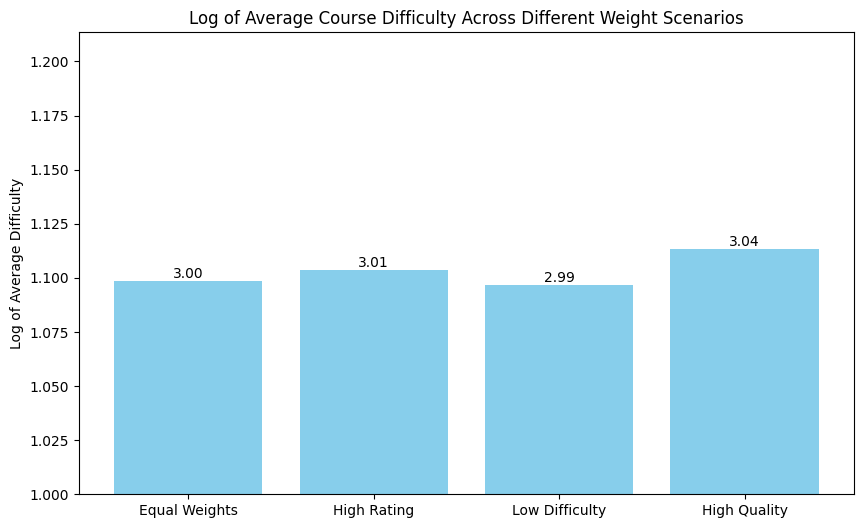

In [ ]:
import matplotlib.pyplot as plt

# Define the scenarios and the transformed data
scenarios = ['Equal Weights', 'High Rating', 'Low Difficulty', 'High Quality']
log_average_difficulties = np.log(average_difficulties)

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(scenarios, log_average_difficulties, color='skyblue')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{np.exp(height):.2f}', ha='center', va='bottom')

plt.ylabel('Log of Average Difficulty')
plt.title('Log of Average Course Difficulty Across Different Weight Scenarios')
plt.ylim(1, max(log_average_difficulties) + 0.1)  # Adjust ylim to provide some space above the bars

plt.show()

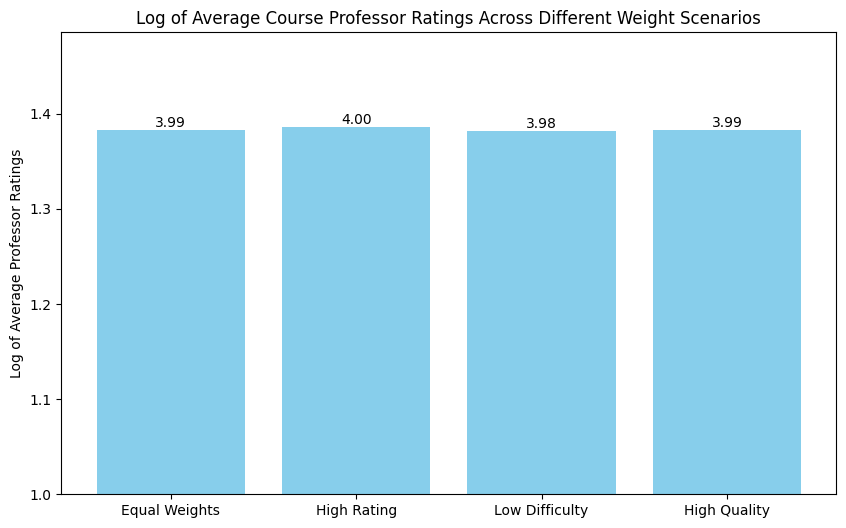

In [ ]:
import matplotlib.pyplot as plt

# Define the scenarios and the transformed data
scenarios = ['Equal Weights', 'High Rating', 'Low Difficulty', 'High Quality']
log_average_ratings = np.log(average_ratings)

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(scenarios, log_average_ratings, color='skyblue')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{np.exp(height):.2f}', ha='center', va='bottom')

plt.ylabel('Log of Average Professor Ratings')
plt.title('Log of Average Course Professor Ratings Across Different Weight Scenarios')
plt.ylim(1, max(log_average_ratings) + 0.1)  # Adjust ylim to provide some space above the bars

plt.show()


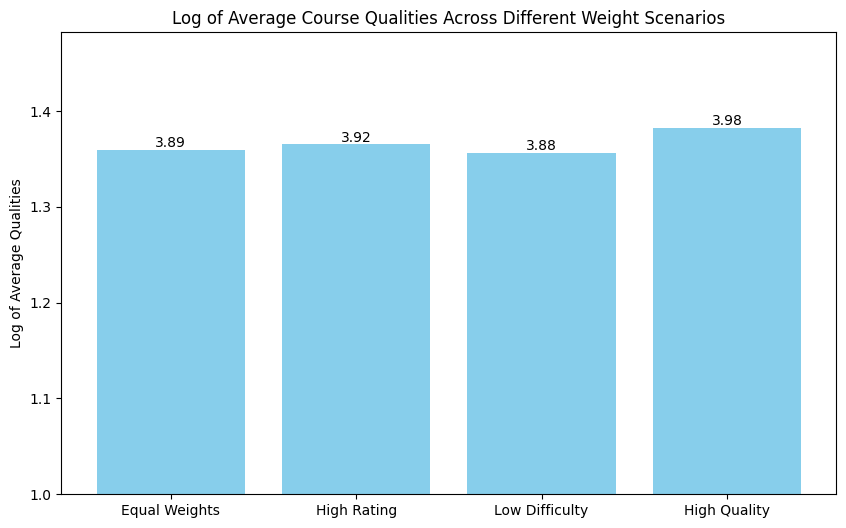

In [ ]:
import matplotlib.pyplot as plt

# Define the scenarios and the transformed data
scenarios = ['Equal Weights', 'High Rating', 'Low Difficulty', 'High Quality']
log_average_qualities = np.log(average_qualities)

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(scenarios, log_average_qualities, color='skyblue')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{np.exp(height):.2f}', ha='center', va='bottom')

plt.ylabel('Log of Average Qualities')
plt.title('Log of Average Course Qualities Across Different Weight Scenarios')
plt.ylim(1, max(log_average_qualities) + 0.1)  # Adjust ylim to provide some space above the bars

plt.show()
